# Livrable 1

## Table des matières
- [Introduction](#introduction)
1. [Contraintes](#1-contraintes)
1. [Modélisation](#2-modélisation)
1. [Implémentation](#3-implémentation)
1. [Exploitation](#4-exploitation)
- [Conclusion](#conclusion)

## Introduction

L'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie) a récemment lancé un appel à manifestation d'intérêt pour promouvoir la réalisation de démonstrations et d'expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.<br><br>
Notre équipe fait partie de la structure CesiCDP déjà implantée dans le domaine et nous avons été mobilisé pour répondre à cet appel.
CesiCDP souhaite que l'on oriente l'étude sur la gestion de tournées de livraison. Le problème algorithmique consiste a calculer, sur un réseau routier quelconque, une tournée permettant de relier entre elles un sous-ensemble de villes avec pour but de revenir au point de départ en un minimum de temps.
Une méthode algorithme permettrant de répondre a ce problème est attendu.
Il est aussi demandé d'ajouter des contraintes supplémentaires afin de rendre le model plus réaliste possible.

## 1. Contraintes

Afin de répondre à l’appel d’offre de l’ADEME, nous avons donc dû identifier les contraintes que nous voulions traiter de notre algorithme.

Notre solution doit :
- Réaliser un cycle permettant de passer par toutes les villes souhaitées,
- Prendre en compte le temps nécessaire pour le trajet entre deux villes.

De plus, nous avons opté pour ajouter une contrainte supplémentaire :
- Le temps de parcours d’une arête varie au cours du temps.
Cette contrainte nous a paru pertinente car le temps nécessaire au transit n’est généralement pas le même en fonction de la densité de circulation qui varie en fonction du temps.

## 2. Définitions des Problèmes

Dans un premier temps, le probleme peut être reformulé sous la forme d'un graph complet composé de l'ensemble de sommets U. L'objectif final étant de relier tous les sommets de ce graph en revenant au point de départ sur la distance la plus courte possible. Cela correspond a l'appellation d'un cycle hamiltonien. Notre objectif est donc de modéliser le cycle hamiltonien ayant la plus courte distance totale et donc le temps d'execution le plus court.

La recherche d'un cycle hamiltonien n'étant pas un probleme ayant une solution de réponse en respectant le temps polynomiale, la recherche du chemin le plus court dans notre cas est donc qualifié de complexité NP-complet. Comme nous souhaitons avoir le meilleur chemin possible, il est necessaire de tester toutes les solutions possible. Notre probleme devient donc un algorithme de type NP-Difficile.

Afin de trouver une solution, nous devons prendre en compte tous les chemins possibles. Cependant, le nombre de chemin disponible est égal a n! (N factoriel). La complexité de cette solution est donc de O(n!), lors de recherches nous avons trouvé une solution permettant de transformer une compléxité O(n!) en O(e<sup>n</sup>).

Dans le but d'avoir un temps de calcul abordable nous avons choisi la solution de faire un algorithme de type heuristique.

## 3. Modélisation

Le problème que l'on nous demande de traiter dans ce projet repose sur un problème plus largement étudier qui est celui du voyageur de commerce. Ce problème est un sujet bien connu en algorithmique du fait de sa complexité initial et du nombre de sous problèmes qu'il soulève. Pour le résoudre nous avons choisis de suivre les études faites sur le sujet et donc d'utiliser des algorithme Heuristiques et Métaheuristiques

Nous avons donc selectionné 3 algorithmes pour nous aider à resoudre notre problèmatique général. Chacun d’eux a ses avantages et ses inconvénients.
Il faudra donc retenir qu'on ne retiendra pas la même solution dans la mesure où l’on va privilégié le temps de calcul, la qualité de la solution, ou encore le choix des solutions.

On peut commencé par cité le premier algorithme que nous allons utilisé qui fait partie de la famille des algorithmes gloutons. Il s'agit d'une famille d'algorithme qui font le choix de l'optimum local pour chaque étapes d'un problème. Celui que nous avons retenu est l’algorithme du plus proche voisin.

L'algorithme du plus proche voisin se base, comme son nom l'indique, sur la selection de la ville la plus proche de la position actuelle. Le principe est que la prochaine ville est sélectionnée tel que le poids de l'arrete entre la ville actuelle et la prochaine ville soit le plus petit possible (distance minimal). L'opération sera répété jusqu'à avoir visité toutes les villes et etre revenu a la ville de départ du cycle.


Pour ceci, nous devons prouver via un algorithme de certificat que la solution est vérifiable en temps polynomiale :
<br></br>

   Dans un premier temps, qu'est-ce qu'un temps polynomiale ?

Un temps polynomial peut être vu comme le temps minimum d’exécution d’un algorithme en fonction des données en
entrée. Un algorithme est résolu en temps polynomial si, pour toutes constantes c et n indépendantes, avec n un entier
présentant la taille des données en entrée, il s’exécute en moins de c.n<sup>k</sup> opérations élémentaires (et k est une constante indépendante des deux autres).

Par la suite, dans notre situation de voyageur de commerce et dans les contraintes demandées, notre solution doit être vérifiable dans un temps polynomiale sur un jeu de données de plusieurs milliers de points. Nous allons donc apporter la preuve :


In [3]:
import numpy as np

size = (10, 10)

adj_mat = np.random.randint(2, size=size)


Dans un premier temps, nous avons généré une matrice d'adjacence. Cette matrice est un échantillon de 10x10 afin d'avoir un temps de demonstration raisonnable.

Dans un second temps, l'objectif est d'afficher cette matrice sous forme de graph :

In [13]:
import networkx as nx
from IPython.display import SVG, display

graph = nx.from_numpy_array(adj_mat, parallel_edges=True, create_using=nx.MultiGraph)

agraph = nx.nx_agraph.to_agraph(graph)
tmp_path = "tmp_graph.svg"
agraph.draw(tmp_path, prog="dot")
display(SVG(tmp_path))


ImportError: requires pygraphviz http://pygraphviz.github.io/

Ici, nous avons réussi la génération du graph, maintenant il nous faut l'algorithme permettant de resoudre ce probleme de manière simple :

In [12]:
path = nx.approximation.traveling_salesman_problem(graph,nodes=list(range(0, 9)), cycle=False)

print(path)

[4, 0, 7, 2, 0, 5, 3, 1, 0, 8, 6]


Ici, nous avons la solution la plus optimisé sans aucune contrainte pour la demonstration. Maintenant, nous allons executer un algorithme de certificat qui prouve que la solution est correcte :

In [52]:
 #Ici algo de certificat avec temps de vérification

In [ ]:
#Ici demontration de la reduction polynomiale

En cherchant et en ce concertant quand aux meilleurs solutions pour repondre à ce problème nous sommes tombé sur 3 algorithmes qui semblait repondre aux besoins du projet :

- K-Nearest Neighbors Algorithm
- Greedy Algorithms
- Tabu search



#### K-Nearest Neightbors Algorithm :

L'algorithme naïf de recherche de voisinage consiste à passer sur l'ensemble des n points de A et à regarder si ce point est plus proche ou non qu'un des plus proches voisins déjà sélectionné, et si oui, l'insérer. On obtient alors un temps de calcul linéaire en la taille de A : O(n) (tant que k << n). Cette méthode est appelée la recherche séquentielle ou recherche linéaire.

Le probleme est que la recherche linéaire souffre d'un problème de lenteur. Si l'ensemble A est grand, il est alors extrêmement coûteux de tester les n points de l'espace.

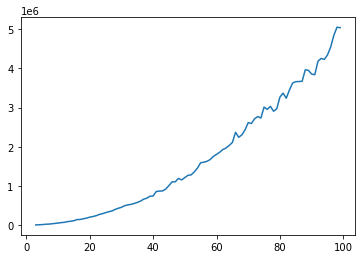

In [15]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

resTime = []

maxN= 100
maxA= 10000

def Pythagore(a, b):
    vect = [b[0]-a[0], b[1]-a[1]]
    return math.sqrt(vect[0]*vect[0]+vect[1]*vect[1])

for i in range(3,maxN):
    for e in range(maxA):
        points = []
        for k in range(i):
            points.append(np.random.randint(0,100,2))
        #if(i>3):
            #print(points)
        start = time.time_ns()
        res = [points[0]]
        dist = 0
        last = points[0]
        points.pop(0)
        #if(i>3):
            #print(points)
        for k in range(i-1):
            temp=[0,Pythagore(last, points[0])]
            if(points.__len__()>1):
                for l in range(1,i-1-k):
                    #if(i>3):
                        #print(points)
                    #print(l)
                    #print(points)
                    foo = Pythagore(last, points[l])
                    if(temp[1]>foo):
                        temp[0]=l
                        temp[1]=foo
            dist += temp[1]
            res.append(points[temp[0]])
            last = points[temp[0]]
            points.pop(temp[0])
        resTime.append([dist,time.time_ns()-start])

Moy = []
for i in range(maxN-3):
    sum=0
    for e in range(maxA):
        sum += resTime[i*maxA+e][1]
    Moy.append(sum/maxA)

plt.plot(range(3,maxN),Moy)
plt.show()
    
        


#### Greedy Algorithms :

#### Tabu search :

La recherche avec tabous est déterministe et a une notion de mémoire. Le choix du meilleur voisin d’une solution pousse l’algorithme à trouver les optima locaux ; et comme l’exploration de l’espace de recherche est effectué en limitant le voisinage de la solution en rendant « tabous » certains mouvements, l’algorithme doit théoriquement visiter l’optimum global.

#### Voyageur de Commerce :

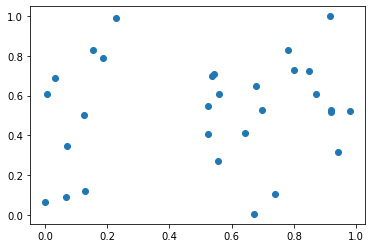

In [17]:
import random
import matplotlib.pyplot as plt

n = 30
x = [ random.random() for _ in range(n) ]
y = [ random.random() for _ in range(n) ]
plt.plot(x,y,"o")

longueur initiale 13.511792195919982
iteration 2 d= 13.511792195919982
iteration 3 d= 3.320710444342439
iteration 4 d= 1.4590925372819878
iteration 5 d= 1.1742245539475924
iteration 6 d= 1.1427443837373616
longueur min 1.1427443837373616


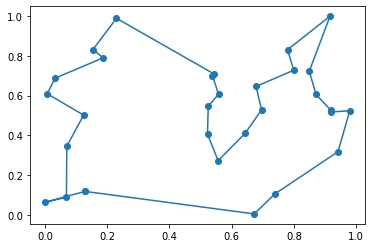

In [18]:
def longueur (x,y, ordre):
    i = ordre[-1]
    x0,y0 = x[i], y[i]
    d = 0
    for o in ordre:
        x1,y1 = x[o], y[o]
        d += (x0-x1)**2 + (y0-y1)**2
        x0,y0 = x1,y1
    return d

ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d)
        d0 = d
        for i in range(0,len(ordre)-1) :
            for j in range(i+2,len(ordre)):
                r = ordre[i:j].copy()
                r.reverse()
                ordre2 = ordre[:i] + r + ordre[j:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")

longueur initiale 13.511792195919982
iteration 0 d= 13.511792195919982
iteration 1 d= 1.0907364194435383
iteration 2 d= 1.0907364194435383
iteration 3 d= 1.0907364194435383
iteration 4 d= 1.0907364194435383
iteration 5 d= 1.0907364194435383
iteration 6 d= 1.0907364194435383
iteration 7 d= 1.0907364194435383
iteration 8 d= 1.0907364194435383
iteration 9 d= 1.0907364194435383
iteration 10 d= 1.0907364194435383
iteration 11 d= 1.0907364194435383
iteration 12 d= 1.0907364194435383
iteration 13 d= 1.0907364194435383
iteration 14 d= 1.0907364194435383
iteration 15 d= 1.0907364194435383
iteration 16 d= 1.0907364194435383
iteration 17 d= 1.0907364194435383
iteration 18 d= 1.0907364194435383
iteration 19 d= 1.0907364194435383
longueur min 1.0907364194435383


Text(0.12427292842776216, 0.5015012037107889, 'N-1')

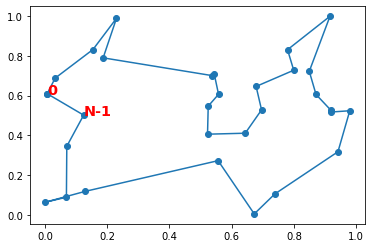

In [19]:
ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))

def permutation_rnd(x,y,ordre,miniter):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 or it < miniter :
        it += 1
        d0 = d
        for i in range(1,len(ordre)-1) :
            for j in range(i+2,len(ordre)+ 1):
                k = random.randint(1,len(ordre)-1)
                l = random.randint(k+1,len(ordre))
                r = ordre[k:l].copy()
                r.reverse()
                ordre2 = ordre[:k] + r + ordre[l:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre

def n_permutation(x,y, miniter):
    ordre = list(range(len(x)))
    bordre = ordre.copy()
    d0 = longueur(x,y,ordre)
    for i in range(0,20):
        print("iteration",i, "d=",d0)
        random.shuffle(ordre)
        ordre = permutation_rnd (x,y,ordre, 20)
        d = longueur(x,y,ordre)
        if d < d0 :
            d0 = d
            bordre = ordre.copy()
    return bordre

ordre = n_permutation (x,y, 20)
print("longueur min", longueur(x,y,ordre))
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"0",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"N-1",color="r",weight="bold",size="x-large")

## 5. Exploitation

## Conclusion